<a href="https://colab.research.google.com/github/ShuvoBipul/Assignment-1/blob/main/Heart_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SkillMorph_Dataset/heart.csv')
print("✅ Dataset loaded successfully!")
print(f"\n📊 Dataset Shape: {df.shape}")

✅ Dataset loaded successfully!

📊 Dataset Shape: (1025, 14)


In [ ]:
# View first 5 rows
print("📋 First 5 Patients:")
df.head()

📋 First 5 Patients:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Dataset information
print("📊 Dataset Information:")
df.info()


📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Statistical summary
print("📈 Statistical Summary:")
df.describe().T

📈 Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [ ]:
target_col = 'target' if 'target' in df.columns else 'num'
X = df.drop(target_col, axis=1)
y = df[target_col]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=20,
    stratify=y
)


In [ ]:
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))



Class distribution in training set:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Class distribution in testing set:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import cross_val_score

cv_accuracies = []
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    cv_accuracies.append(scores.mean())

best_k = cv_accuracies.index(max(cv_accuracies)) + 1
print(f"Best K (CV): {best_k}")


Best K (CV): 11


In [ ]:
# Train final KNN model
print(f"\n🤖 Training KNN with K = {best_k}...\n")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("✅ KNN Model trained!")
print(f"\n📊 KNN Accuracy: {knn_accuracy:.4f} ({knn_accuracy*100:.2f}%)")


🤖 Training KNN with K = 11...

✅ KNN Model trained!

📊 KNN Accuracy: 0.5024 (50.24%)



📋 KNN Classification Report:
              precision    recall  f1-score   support

     Healthy       0.49      0.45      0.47       100
    Diabetes       0.51      0.55      0.53       105

    accuracy                           0.50       205
   macro avg       0.50      0.50      0.50       205
weighted avg       0.50      0.50      0.50       205



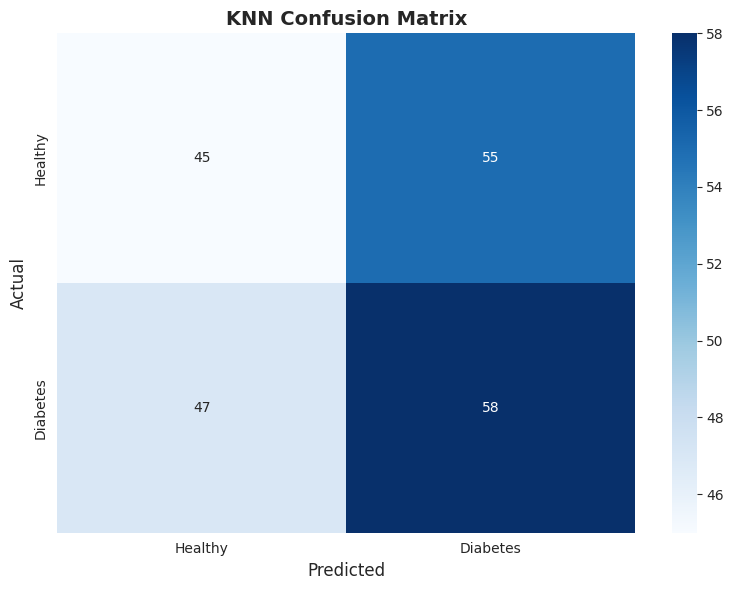

In [ ]:
# Evaluation
print("\n📋 KNN Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_knn, target_names=['Healthy', 'Diabetes']))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Diabetes'],
            yticklabels=['Healthy', 'Diabetes'])
plt.title('KNN Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)

In [ ]:
# Train Decision Tree
print("🌳 Training Decision Tree...\n")

dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,          # Limit depth to avoid overfitting
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)  # No scaling needed
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("✅ Decision Tree trained!")
print(f"\n📊 Decision Tree Accuracy: {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")

🌳 Training Decision Tree...

✅ Decision Tree trained!

📊 Decision Tree Accuracy: 0.8780 (87.80%)



📋 Decision Tree Classification Report:
              precision    recall  f1-score   support

     Healthy       0.89      0.85      0.87       100
    Diabetes       0.86      0.90      0.88       105

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



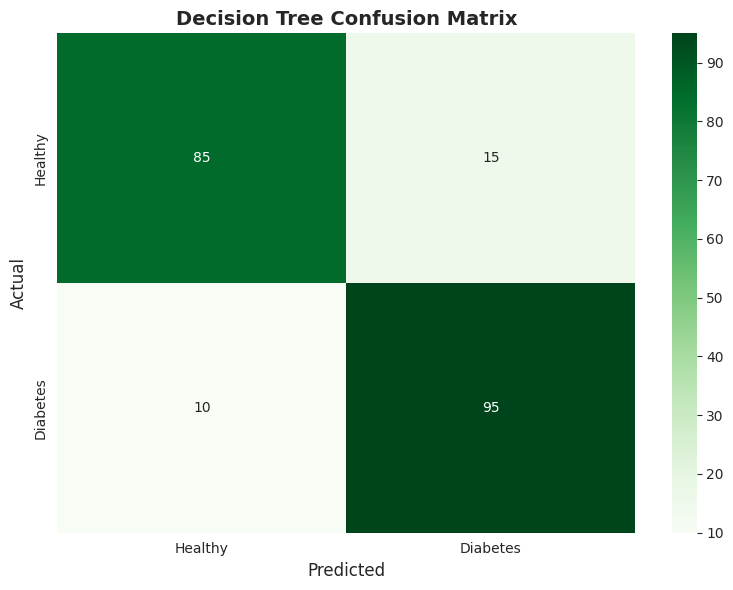

In [ ]:
# Evaluation
print("\n📋 Decision Tree Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_dt, target_names=['Healthy', 'Diabetes']))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Healthy', 'Diabetes'],
            yticklabels=['Healthy', 'Diabetes'])
plt.title('Decision Tree Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)


⭐ Feature Importance (Decision Tree):
 Feature  Importance
      cp    0.355658
      ca    0.154352
 oldpeak    0.126743
     age    0.101727
    thal    0.086859
    chol    0.069893
   exang    0.033200
 restecg    0.030115
     sex    0.026146
 thalach    0.010147
trestbps    0.005159
     fbs    0.000000
   slope    0.000000


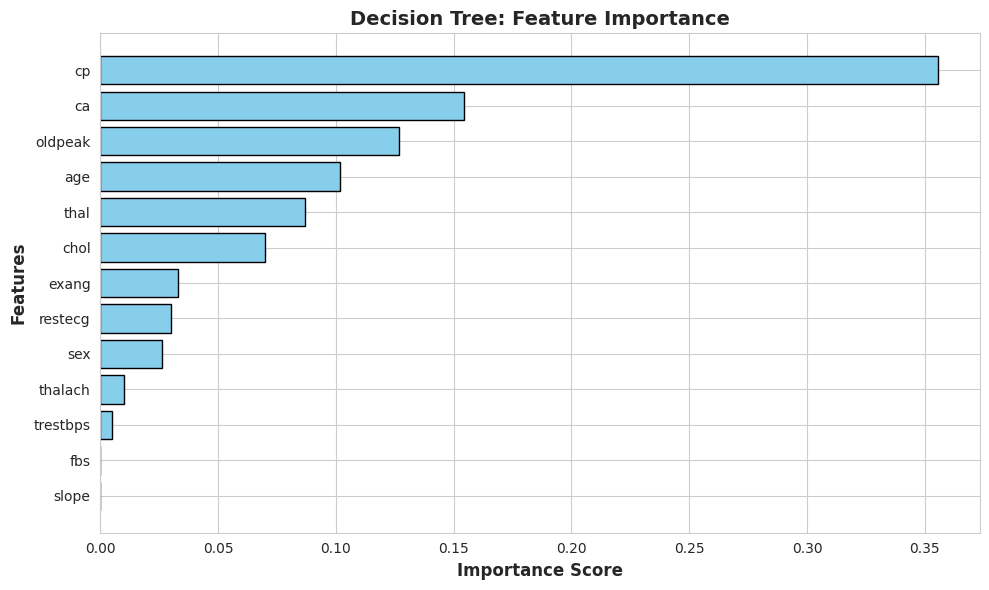


💡 These features are most important for prediction!



In [ ]:
# Feature Importance
print("\n⭐ Feature Importance (Decision Tree):")
print("=" * 60)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Decision Tree: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 These features are most important for prediction!")
print("\n" + "="*60)

In [ ]:
# Train Random Forest
print("🌲🌳🌲 Training Random Forest...\n")

rf_model = RandomForestClassifier(
    n_estimators=100,     # 100 trees
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1             # Use all CPU cores
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("✅ Random Forest trained!")
print(f"   → {rf_model.n_estimators} trees created")
print(f"   → Each tree votes")
print(f"\n📊 Random Forest Accuracy: {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")

🌲🌳🌲 Training Random Forest...

✅ Random Forest trained!
   → 100 trees created
   → Each tree votes

📊 Random Forest Accuracy: 0.8976 (89.76%)



📋 Random Forest Classification Report:
              precision    recall  f1-score   support

     Healthy       0.92      0.86      0.89       100
    Diabetes       0.88      0.93      0.90       105

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



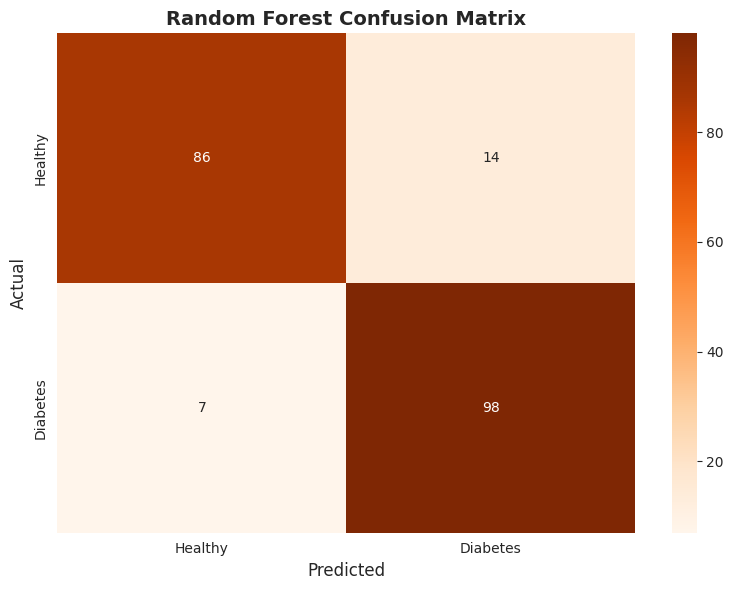

In [ ]:
# Evaluation
print("\n📋 Random Forest Classification Report:")
print("=" * 60)
print(classification_report(y_test, y_pred_rf, target_names=['Healthy', 'Diabetes']))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Healthy', 'Diabetes'],
            yticklabels=['Healthy', 'Diabetes'])
plt.title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

print("\n" + "="*60)


⭐ Feature Importance (Random Forest):
 Feature  Importance
      cp    0.167892
      ca    0.155514
 oldpeak    0.141898
    thal    0.136503
 thalach    0.115135
   exang    0.061942
   slope    0.057330
     age    0.055920
     sex    0.042323
    chol    0.031327
trestbps    0.023694
 restecg    0.009024
     fbs    0.001498


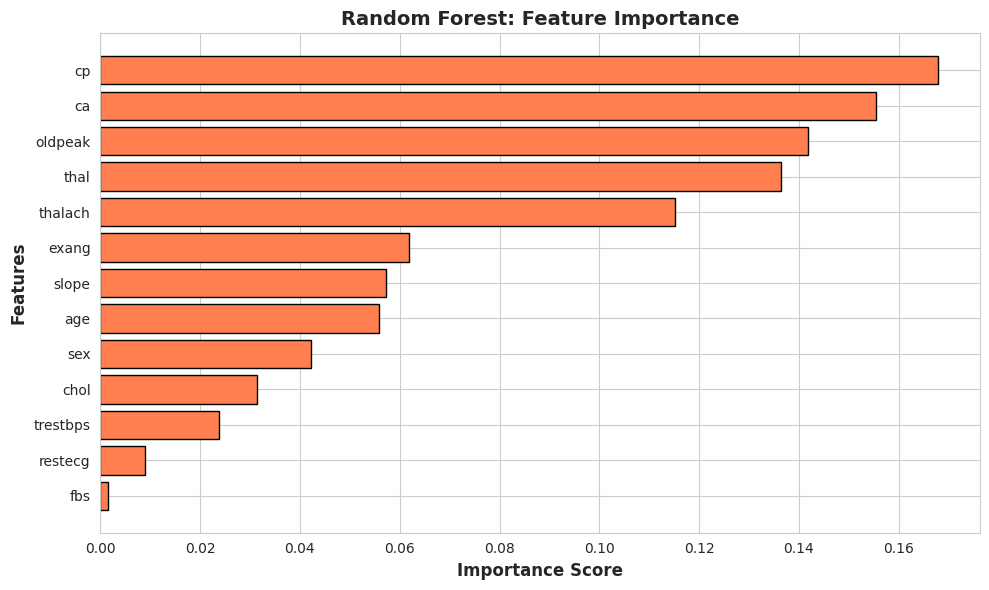


💡 Random Forest importance is more reliable!
   (Average of 100 trees)



In [ ]:
# Feature Importance
print("\n⭐ Feature Importance (Random Forest):")
print("=" * 60)

rf_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(rf_feature_importance.to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(rf_feature_importance['Feature'], rf_feature_importance['Importance'],
         color='coral', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Random Forest: Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n💡 Random Forest importance is more reliable!")
print("   (Average of 100 trees)")
print("\n" + "="*60)

In [ ]:
# Compare all models
print("\n🏆 FINAL MODEL COMPARISON")
print("=" * 60)

comparison = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [knn_accuracy, dt_accuracy, rf_accuracy],
    'Accuracy %': [f"{knn_accuracy*100:.2f}%", f"{dt_accuracy*100:.2f}%", f"{rf_accuracy*100:.2f}%"]
})

comparison = comparison.sort_values('Accuracy', ascending=False)
print("\n" + comparison.to_string(index=False))

best_model = comparison.iloc[0]['Model']
best_acc = comparison.iloc[0]['Accuracy']

print(f"\n🥇 WINNER: {best_model}")
print(f"   Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print("\n" + "="*60)


🏆 FINAL MODEL COMPARISON

        Model  Accuracy Accuracy %
Random Forest  0.897561     89.76%
Decision Tree  0.878049     87.80%
          KNN  0.502439     50.24%

🥇 WINNER: Random Forest
   Accuracy: 0.8976 (89.76%)



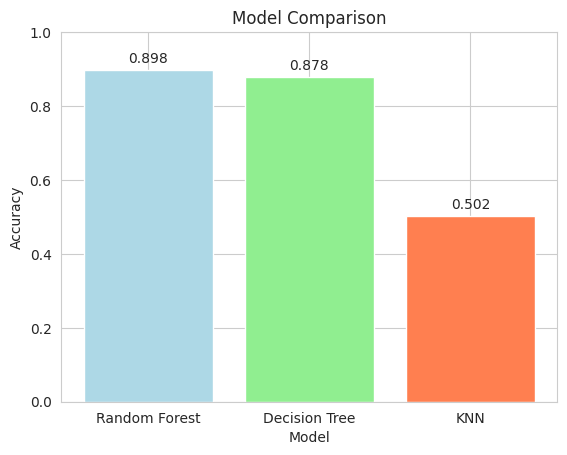

In [ ]:
# Visual Comparison
plt.bar(comparison['Model'], comparison['Accuracy'], color=['lightblue', 'lightgreen', 'coral'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim([0, 1])

# Add values on bars
for i, acc in enumerate(comparison['Accuracy']):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center')

plt.show()